In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# load the data
df=pd.read_csv("House_price.csv")
df.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Get the shape of the data (Understand the no of rows & columns)
df.shape

(4548, 7)

In [5]:
# Get information about the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
 6   Address             4548 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.8+ KB


In [6]:
# Get information about the numeric columns
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,3.981693,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,1.230939,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.332187,6.299692,3.140000,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,4.050000,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,4.490000,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06


In [7]:
# get information about the column with string data
st = df.describe(include='O')
print(st)

                                                  Address
count                                                4548
unique                                               4548
top     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
freq                                                    1


In [71]:
# Extract City from Address
df['Ct'] = df['Address'].str.extract(r'([" "][A-Z][A-Z][" "][0-9][0-9][0-9][0-9][0-9]*)', expand=False).str.strip()
df['City'] = df['Ct'].str.extract(r'([A-Z][A-Z])', expand=False).str.strip()
df=df.drop(['Ct'],axis=1)

In [42]:
# Check whether we were able to extract City for all the Addtess provided
df['City'].isnull().sum()

1

In [72]:
# Find the details of the row for which the City column is null
df[df['City'].isnull()]

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,City
4547,66935.47508,6.37639,8.513826,5.47,17573.6171,1109059.054,55454 M,NaN


In [11]:
df['City'].value_counts()

AP    153
AA    152
AE    151
KY     85
GU     84
     ... 
AK     62
KS     59
MD     55
IL     53
VI     48
Name: City, Length: 62, dtype: int64

In [73]:
# Drop the row for which the City column is NA
df = df.dropna()

In [74]:
# Apply Label encoding on the City Column and convert it into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [91]:
print(df['City'].unique())

[37  8 59  4  1 22  9 52  0 40 48  5 17 27 21 29 12  7 25 30  3 42 41 55
 19 44 38 31 60 61 28 54 51 10  2 58 49 39 23 35 18 57 14 36 24 32 45 53
 11 47 34  6 43 33 20 56 15 46 26 50 16 13]


In [75]:
df

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,City
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",37
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",8
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",59
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,1
...,...,...,...,...,...,...,...,...
4542,58153.22930,5.643086,6.751951,3.39,45756.53195,1.150439e+06,"4771 Thomas Drive Apt. 125\nEast Lauren, GA 99732",15
4543,84556.63627,5.092459,6.723412,2.42,31797.31744,1.326847e+06,"97160 Tracy Junction\nErinborough, WY 73884",61
4544,82732.98111,5.332712,6.198476,3.49,41136.52722,1.252664e+06,"0630 Wilson Shoal\nNorth Philip, AK 91611",2
4545,65694.05127,6.436741,6.704929,3.14,43406.71203,1.359763e+06,"PSC 2681, Box 5759\nAPO AA 82431-2879",0


In [19]:
# Get information about all the columns now
df.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,City
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.547000e+03,4547.000000
mean,68612.069462,5.978831,6.987310,3.981366,36191.562989,1.233943e+06,28.839675
std,10687.634147,0.990941,1.006443,1.230876,9907.433368,3.546018e+05,18.480737
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.000000
25%,61484.426395,5.331910,6.299576,3.140000,29424.616885,9.977230e+05,12.000000
50%,68817.202360,5.960820,7.002164,4.050000,36215.962550,1.234610e+06,29.000000
75%,75821.684715,6.658390,7.665622,4.490000,42883.591795,1.470754e+06,45.000000
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06,61.000000


In [ ]:
# No Null values present to be actioned
# No Categorical Data to be actioned (Already addressed City)

(array([1.000e+00, 2.000e+00, 6.000e+01, 3.200e+02, 9.530e+02, 1.450e+03,
        1.189e+03, 4.660e+02, 9.700e+01, 9.000e+00]),
 array([ 17796.63119 ,  26787.142911,  35777.654632,  44768.166353,
         53758.678074,  62749.189795,  71739.701516,  80730.213237,
         89720.724958,  98711.236679, 107701.7484  ]),
 <BarContainer object of 10 artists>)

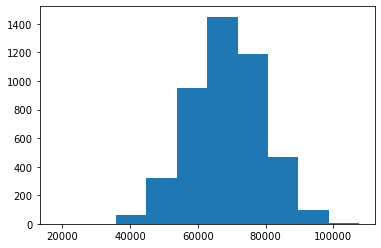

In [57]:
# Check if all the variables are normally distributed
# Check if Avg. Area Income is normally distributed
plt.hist(df['Avg. Area Income'])

(array([  14.,   90.,  353.,  782., 1226., 1119.,  641.,  251.,   66.,
           5.]),
 array([2.64430419, 3.33178257, 4.01926096, 4.70673935, 5.39421774,
        6.08169613, 6.76917451, 7.4566529 , 8.14413129, 8.83160968,
        9.51908807]),
 <BarContainer object of 10 artists>)

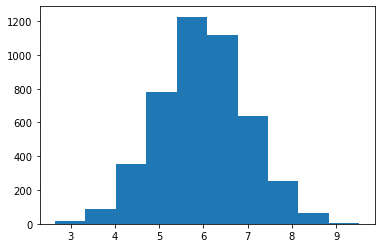

In [58]:
# Check if House Age is normally distributed
plt.hist(df['House Age'])

(array([   4.,   65.,  235.,  759., 1201., 1249.,  741.,  240.,   48.,
           5.]),
 array([ 3.23619402,  3.98853345,  4.74087289,  5.49321232,  6.24555175,
         6.99789118,  7.75023061,  8.50257004,  9.25490948, 10.00724891,
        10.75958834]),
 <BarContainer object of 10 artists>)

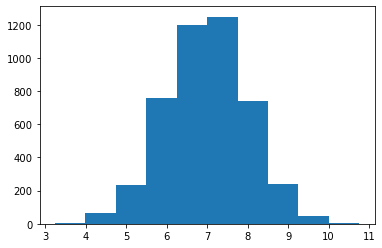

In [59]:
# Check if Number of Rooms is normally distributed
plt.hist(df['Number of Rooms'])

(array([   8.,   42.,  233.,  656., 1092., 1219.,  834.,  338.,  108.,
          17.]),
 array([  172.6106863 ,  7114.55364167, 14056.49659704, 20998.43955241,
        27940.38250778, 34882.32546315, 41824.26841852, 48766.21137389,
        55708.15432926, 62650.09728463, 69592.04024   ]),
 <BarContainer object of 10 artists>)

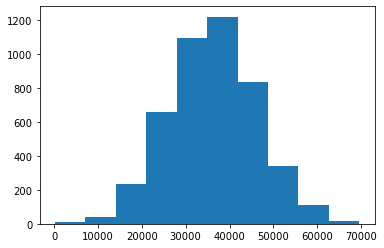

In [61]:
# Check if Area Population is normally distributed
plt.hist(df['Area Population'])

(array([656.,  95., 930., 434., 680., 654., 169., 377.,  43., 509.]),
 array([2.  , 2.45, 2.9 , 3.35, 3.8 , 4.25, 4.7 , 5.15, 5.6 , 6.05, 6.5 ]),
 <BarContainer object of 10 artists>)

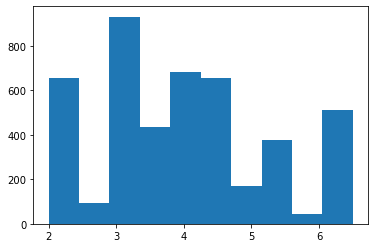

In [60]:
# Check if Number of Bedrooms is normally distributed
plt.hist(df['Number of Bedrooms'])

In [76]:
# since No of Bedrooms variable is not normally distributed, need to tranform them
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log, validate=True)
cols=['Number of Bedrooms']
df[cols] = log_transform.transform(df[cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


(array([ 366.,  385.,    0.,  570.,  794.,  180., 1154.,  161.,  385.,
         552.]),
 array([0.69314718, 0.81101268, 0.92887818, 1.04674368, 1.16460918,
        1.28247468, 1.40034018, 1.51820568, 1.63607118, 1.75393668,
        1.87180218]),
 <BarContainer object of 10 artists>)

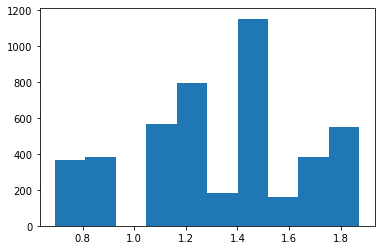

In [78]:
# Check if Number of Bedrooms is normally distributed
plt.hist(df['Number of Bedrooms'])

In [77]:
df

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,City
0,79545.45857,5.682861,7.009188,1.408545,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",37
1,79248.64245,6.002900,6.730821,1.128171,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",8
2,61287.06718,5.865890,8.512727,1.635106,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",59
3,63345.24005,7.188236,5.586729,1.181727,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,4
4,59982.19723,5.040555,7.839388,1.442202,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,1
...,...,...,...,...,...,...,...,...
4542,58153.22930,5.643086,6.751951,1.220830,45756.53195,1.150439e+06,"4771 Thomas Drive Apt. 125\nEast Lauren, GA 99732",15
4543,84556.63627,5.092459,6.723412,0.883768,31797.31744,1.326847e+06,"97160 Tracy Junction\nErinborough, WY 73884",61
4544,82732.98111,5.332712,6.198476,1.249902,41136.52722,1.252664e+06,"0630 Wilson Shoal\nNorth Philip, AK 91611",2
4545,65694.05127,6.436741,6.704929,1.144223,43406.71203,1.359763e+06,"PSC 2681, Box 5759\nAPO AA 82431-2879",0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg. Area Income'>

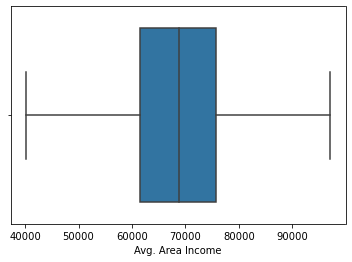

In [192]:
# Check & Address the Outliers
# This is a sample. Not needed for this process
# Checking for Avg. Area Income
import seaborn as sns
sns.boxplot(df['Avg. Area Income'])

In [191]:
# Calculating IQR & finding how many rows are above the upper value & below the lower value
Q1 = np.percentile(df['Avg. Area Income'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Avg. Area Income'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)
upper = df['Avg. Area Income'] >= (Q3+1.5*IQR)
print("Upper bound:",upper)
print(np.where(upper))
lower = df['Avg. Area Income'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

14252.71702499999
Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
4542    False
4543    False
4544    False
4545    False
4546    False
Name: Avg. Area Income, Length: 4518, dtype: bool
(array([], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
4542    False
4543    False
4544    False
4545    False
4546    False
Name: Avg. Area Income, Length: 4518, dtype: bool
(array([3056], dtype=int64),)


In [190]:
# removing the rows which are above & below, upper & lower bound
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Avg. Area Income'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Avg. Area Income'] <= (Q1-1.5*IQR))
#Removing the Outliers 
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (4519, 8)
New Shape:  (4518, 8)


In [178]:
# Create Independent & Dependent Variables
X = df[['Avg. Area Income', 'House Age', 'Number of Rooms','Number of Bedrooms','Area Population']]
y = df['Price']

In [179]:
# Create Training & Test Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [145]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-1.09,  0.78, -0.24, -0.  , -1.51],
       [ 1.93, -1.29, -1.61,  0.78,  0.66],
       [-0.28,  1.59,  0.22, -0.29,  0.76],
       ...,
       [-0.35, -0.05,  0.23,  1.78,  1.09],
       [ 0.36,  0.78, -0.35, -0.15,  1.2 ],
       [ 0.15, -0.61, -1.48, -0.99,  0.93]])

In [180]:
# Model Building - Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train)
lin.score(X_train,y_train)

0.9199256271099938

In [181]:
# Feature Selection
# feature extraction
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model,step=3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 2
Selected Features: [False  True  True False False]
Feature Ranking: [2 1 1 2 2]


In [172]:
# feature extraction
model = LinearRegression().fit(X,y)
model.coef_

array([1.62e+05, 2.00e+05, 1.51e+01])

In [183]:
# Dropping Features and checking whether there is an impact.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

              feature        VIF
0    Avg. Area Income  29.705715
1           House Age  27.647577
2     Number of Rooms  47.859994
3  Number of Bedrooms  23.490408
4     Area Population  12.887736


In [184]:
pred = lin.predict(X_test)

In [185]:
np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[1151178.03 1166198.12]
 [1345522.75 1536143.59]
 [1524004.3  1526025.66]
 ...
 [ 971633.25  934111.64]
 [1372392.65 1366668.19]
 [1678849.61 1651684.77]]


In [186]:
print(lin.intercept_)
print(lin.coef_)

-2628747.1578830583
[2.16e+01 1.65e+05 1.21e+05 3.96e+03 1.51e+01]
